In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
from statsmodels import api as sm
from scipy import stats
from sklearn.metrics import mean_squared_error
import os
from sklearn.model_selection import train_test_split
from skimage.feature import hog
from skimage.color import rgb2gray
from sklearn import decomposition

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Sequential
from tensorflow.keras import activations
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tensorboard import notebook

from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.preprocessing.sequence import pad_sequences

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import sklearn
import scipy.io
import numpy
import cv2

from sklearn.svm import SVC,NuSVC
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import reciprocal, uniform
from sklearn.metrics import accuracy_score

In [19]:
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report, roc_curve,auc
def eval_model(model):
    #predict Test Accuracy
    test_scores = model.evaluate(test,test_y,verbose=2)
    print("Testing Loss: "+str(test_scores[0]))
    print("Testing Accuracy: "+str(test_scores[1]))

    #display the ROC Curve
    classes = numpy.unique(train_y)
    fig = plt.figure(figsize=[10,10])
    ax = fig.add_subplot(1,1,1)
    for i in range(10):
        fpr,tpr,_=roc_curve(test_y,pred[:,i],pos_label=classes[i])
        auc_score = auc(fpr,tpr)
        ax.plot(fpr,tpr,label='%s: %0.2f' % (classes[i],auc_score))
    ax.legend()

    #confusion matrix
    fig = plt.figure(figsize=[10,10])
    ax = fig.add_subplot(1,1,1)
    pred = model.predict(test)
    indexes = tf.argmax(pred,axis=1)
    cm = confusion_matrix(test_y,indexes)
    c = ConfusionMatrixDisplay(cm,display_labels=range(10))
    c.plot(ax=ax)
    ax.set_title('Testing Performance')
    eval_model(new_model)


In [8]:
#THIS DATA IS ONLY FOR THE CNN, IT WONT WORK FOR KNN OR SVM
root_dir = os.path.abspath(os.getcwd())+"/256_ObjectCategories/"
#add the arrays that we can use for training and testing
main_x = []
main_y = []
prev_file = [""]
current_index = 0
for subdir, dirs, files in os.walk(root_dir):
    for dir in dirs:
        current_dir = os.path.join(root_dir) + dir
        after = str(current_dir.split(".",1)[1])
        for file in os.listdir(current_dir):
            filename = os.fsdecode(file)
            if filename.endswith(".jpg"):
                current_file = cv2.imread(os.path.join(current_dir,filename),0)
                current_file = cv2.resize(current_file, dsize=(54, 140), interpolation=cv2.INTER_CUBIC)
                main_x.append(current_file)
                main_y.append(current_index)
                continue
            else:
                continue
        current_index = current_index+1
    break
images_x = np.array(main_x)
images_y = np.array(main_y)
print(np.shape(images_x))

(30607, 140, 54)


In [10]:
temp_x_train, x_test, temp_y_train, y_test = train_test_split(images_x,images_y,test_size=0.2, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(temp_x_train,temp_y_train,test_size=0.2,random_state=42)
print(numpy.shape(x_train))
print(numpy.shape(x_test))
print(numpy.shape(x_val))

(19588, 140, 54)
(6122, 140, 54)
(4897, 140, 54)


(19588, 140, 54)
(6122, 140, 54)
(4897, 140, 54)


In [11]:
print(images_x[0])

[118 127 143 ... 126 131 124]


int32


IndexError: too many indices for array: array is 2-dimensional, but 3 were indexed

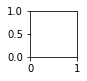

In [12]:
print(images_y.dtype)
fig = plt.figure(figsize=[10,10])
for i in range(100):
    ax = fig.add_subplot(10,10,i+1)
    ax.imshow(x_train[i,:,:])

In [18]:
    inputs = keras.Input(shape=(140,54,1),name='img')
    x = layers.Conv2D(filters=8, kernel_size=(5,5), padding='same', activation='relu')(inputs)
    x = layers.Conv2D(filters=16, kernel_size=(5,5), padding='same', activation=None)(x)
    # batch normalisation, before the non-linearity
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    # spatial dropout, this will drop whole kernels, i.e. 20% of our 3x3 filters will be dropped out rather
    # than dropping out 20% of the invidual pixels
    x = layers.SpatialDropout2D(0.35)(x) #removes some of the learned features
    # max pooling, 2x2, which will downsample the image
    x = layers.MaxPool2D(pool_size=(4, 4))(x) #makes images softer to remove slight changes to reduce feature maps - downsampling and keeps details
    
    x = layers.Conv2D(filters=8, kernel_size=(5,5), padding='same', activation='relu')(inputs)
    x = layers.Conv2D(filters=16, kernel_size=(5,5), padding='same', activation=None)(x)
    # batch normalisation, before the non-linearity
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    # spatial dropout, this will drop whole kernels, i.e. 20% of our 3x3 filters will be dropped out rather
    # than dropping out 20% of the invidual pixels
    x = layers.SpatialDropout2D(0.35)(x) #removes some of the learned features
    # max pooling, 2x2, which will downsample the image
    x = layers.MaxPool2D(pool_size=(4, 4))(x) #makes images softer to remove slight changes to reduce feature maps - downsampling and keeps details
    
    x = layers.Conv2D(filters=8, kernel_size=(5,5), padding='same', activation='relu')(inputs)
    x = layers.Conv2D(filters=16, kernel_size=(5,5), padding='same', activation=None)(x)
    # batch normalisation, before the non-linearity
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    # spatial dropout, this will drop whole kernels, i.e. 20% of our 3x3 filters will be dropped out rather
    # than dropping out 20% of the invidual pixels
    x = layers.SpatialDropout2D(0.35)(x) #removes some of the learned features
    # max pooling, 2x2, which will downsample the image
    x = layers.MaxPool2D(pool_size=(4, 4))(x) #makes images softer to remove slight changes to reduce feature maps - downsampling and keeps details
    
    x = layers.Conv2D(filters=8, kernel_size=(5,5), padding='same', activation='relu')(inputs)
    x = layers.Conv2D(filters=16, kernel_size=(5,5), padding='same', activation=None)(x)
    # batch normalisation, before the non-linearity
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    # spatial dropout, this will drop whole kernels, i.e. 20% of our 3x3 filters will be dropped out rather
    # than dropping out 20% of the invidual pixels
    x = layers.SpatialDropout2D(0.35)(x) #removes some of the learned features
    # max pooling, 2x2, which will downsample the image
    x = layers.MaxPool2D(pool_size=(4, 4))(x) #makes images softer to remove slight changes to reduce feature maps - downsampling and keeps details
    
    x = layers.Conv2D(filters=8, kernel_size=(5,5), padding='same', activation='relu')(inputs)
    x = layers.Conv2D(filters=16, kernel_size=(5,5), padding='same', activation=None)(x)
    # batch normalisation, before the non-linearity
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    # spatial dropout, this will drop whole kernels, i.e. 20% of our 3x3 filters will be dropped out rather
    # than dropping out 20% of the invidual pixels
    x = layers.SpatialDropout2D(0.35)(x) #removes some of the learned features
    # max pooling, 2x2, which will downsample the image
    x = layers.MaxPool2D(pool_size=(4, 4))(x) #makes images softer to remove slight changes to reduce feature maps - downsampling and keeps details
    # rinse and repeat with 2D convs, batch norm, dropout and max pool

    # flatten layer
    x = layers.Flatten()(x)
    # we'll use a couple of dense layers here, mainly so that we can show what another dropout layer looks like 
    # in the middle
    x = layers.Dense(256, activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    x = layers.Dense(64, activation='relu')(x)
    # the output
    outputs = layers.Dense(257)(x)

    # build the model, and print a summary
    model_cnn = keras.Model(inputs=inputs, outputs=outputs, name='cnn_model')
    model_cnn.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=keras.optimizers.Adam(),
    metrics=['accuracy'])
    history = model_cnn.fit(x_train,y_train,
    batch_size=256,
    epochs=100,
    validation_data=(x_test,y_test))
    history = model_cnn.fit(x_train, y_train, batch_size = 128, epochs = 100, validation_data = (x_test, y_test))

Epoch 1/100


InvalidArgumentError:  Received a label value of 257 which is outside the valid range of [0, 257).  Label values: 124 179 150 154 149 218 213 172 93 145 34 164 167 105 3 113 187 150 34 246 8 103 231 188 77 64 114 171 236 165 63 207 157 139 175 236 185 8 8 202 81 238 176 13 252 145 103 251 27 151 194 42 208 98 237 245 81 59 195 136 212 166 236 72 123 110 123 235 145 209 5 114 196 185 90 105 29 53 145 233 117 15 145 257 119 23 169 253 157 64 66 244 51 208 133 140 232 19 158 147 225 68 235 143 8 226 214 14 145 226 140 204 232 126 58 195 96 109 90 190 113 257 138 118 15 163 42 145 122 173 18 236 145 251 244 178 12 232 150 140 86 239 243 19 137 183 199 63 36 227 251 113 25 97 145 142 257 251 44 217 217 241 257 257 93 220 150 94 205 5 252 193 109 208 106 50 179 197 70 180 134 72 50 2 138 146 164 228 232 97 43 84 141 227 54 245 238 145 54 46 135 165 193 12 232 195 129 3 55 127 170 57 30 148 137 84 253 215 7 232 232 90 31 63 4 201 253 97 211 87 226 125 57 71 89 127 182 25 7 103 88 89 148 133 153 17 89 136 251 253 127 189 120 24 96 3
	 [[node sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits (defined at <ipython-input-18-63a65e8d806d>:73) ]] [Op:__inference_train_function_13946]

Function call stack:
train_function


In [24]:
num_epochs = 100

def build_model(num_classes,output_activation=None):
    inputs = keras.Input(shape=(140,54,1),name='img')
    x = layers.Conv2D(filters=8, kernel_size=(5,5), padding='same', activation='relu')(inputs)
    x = layers.Conv2D(filters=16, kernel_size=(5,5), padding='same', activation=None)(x)
    # batch normalisation, before the non-linearity
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    # spatial dropout, this will drop whole kernels, i.e. 20% of our 3x3 filters will be dropped out rather
    # than dropping out 20% of the invidual pixels
    x = layers.SpatialDropout2D(0.35)(x) #removes some of the learned features
    # max pooling, 2x2, which will downsample the image
    x = layers.MaxPool2D(pool_size=(4, 4))(x) #makes images softer to remove slight changes to reduce feature maps - downsampling and keeps details
    
    x = layers.Conv2D(filters=8, kernel_size=(5,5), padding='same', activation='relu')(inputs)
    x = layers.Conv2D(filters=16, kernel_size=(5,5), padding='same', activation=None)(x)
    # batch normalisation, before the non-linearity
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    # spatial dropout, this will drop whole kernels, i.e. 20% of our 3x3 filters will be dropped out rather
    # than dropping out 20% of the invidual pixels
    x = layers.SpatialDropout2D(0.35)(x) #removes some of the learned features
    # max pooling, 2x2, which will downsample the image
    x = layers.MaxPool2D(pool_size=(4, 4))(x) #makes images softer to remove slight changes to reduce feature maps - downsampling and keeps details
    
    x = layers.Conv2D(filters=8, kernel_size=(5,5), padding='same', activation='relu')(inputs)
    x = layers.Conv2D(filters=16, kernel_size=(5,5), padding='same', activation=None)(x)
    # batch normalisation, before the non-linearity
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    # spatial dropout, this will drop whole kernels, i.e. 20% of our 3x3 filters will be dropped out rather
    # than dropping out 20% of the invidual pixels
    x = layers.SpatialDropout2D(0.35)(x) #removes some of the learned features
    # max pooling, 2x2, which will downsample the image
    x = layers.MaxPool2D(pool_size=(4, 4))(x) #makes images softer to remove slight changes to reduce feature maps - downsampling and keeps details
    
    x = layers.Conv2D(filters=8, kernel_size=(5,5), padding='same', activation='relu')(inputs)
    x = layers.Conv2D(filters=16, kernel_size=(5,5), padding='same', activation=None)(x)
    # batch normalisation, before the non-linearity
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    # spatial dropout, this will drop whole kernels, i.e. 20% of our 3x3 filters will be dropped out rather
    # than dropping out 20% of the invidual pixels
    x = layers.SpatialDropout2D(0.35)(x) #removes some of the learned features
    # max pooling, 2x2, which will downsample the image
    x = layers.MaxPool2D(pool_size=(4, 4))(x) #makes images softer to remove slight changes to reduce feature maps - downsampling and keeps details
    
    x = layers.Conv2D(filters=8, kernel_size=(5,5), padding='same', activation='relu')(inputs)
    x = layers.Conv2D(filters=16, kernel_size=(5,5), padding='same', activation=None)(x)
    # batch normalisation, before the non-linearity
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    # spatial dropout, this will drop whole kernels, i.e. 20% of our 3x3 filters will be dropped out rather
    # than dropping out 20% of the invidual pixels
    x = layers.SpatialDropout2D(0.35)(x) #removes some of the learned features
    # max pooling, 2x2, which will downsample the image
    x = layers.MaxPool2D(pool_size=(4, 4))(x) #makes images softer to remove slight changes to reduce feature maps - downsampling and keeps details
    # rinse and repeat with 2D convs, batch norm, dropout and max pool

    # flatten layer
    x = layers.Flatten()(x)
    # we'll use a couple of dense layers here, mainly so that we can show what another dropout layer looks like 
    # in the middle
    x = layers.Dense(256, activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    x = layers.Dense(64, activation='relu')(x)
    # the output
    outputs = layers.Dense(258,activation=output_activation)(x)

    # build the model, and print a summary
    model_cnn = keras.Model(inputs=inputs, outputs=outputs, name='cnn_model')

    return model_cnn

model_cnn = build_model(257)
model_cnn.summary()

Model: "cnn_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
img (InputLayer)             [(None, 140, 54, 1)]      0         
_________________________________________________________________
conv2d_128 (Conv2D)          (None, 140, 54, 8)        208       
_________________________________________________________________
conv2d_129 (Conv2D)          (None, 140, 54, 16)       3216      
_________________________________________________________________
batch_normalization_64 (Batc (None, 140, 54, 16)       64        
_________________________________________________________________
activation_64 (Activation)   (None, 140, 54, 16)       0         
_________________________________________________________________
spatial_dropout2d_64 (Spatia (None, 140, 54, 16)       0         
_________________________________________________________________
max_pooling2d_64 (MaxPooling (None, 35, 13, 16)        0 

In [25]:
model_cnn.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
optimizer=keras.optimizers.Adam(),
metrics=['accuracy'])
history = model_cnn.fit(x_train,y_train,
batch_size=256,
epochs=num_epochs,
validation_data=(x_test,y_test))

Epoch 1/100
54/77 [====================>.........] - ETA: 26s - loss: 14.5196 - accuracy: 0.0108

KeyboardInterrupt: 

In [27]:
checkpoint_dir = "./ckpt"
if not os.path.exists(checkpoint_dir):
    os.makedirs(checkpoint_dir)
def get_compiled_model():
    build_model(257)

def make_or_restore_model():
    #either restore the latest model or create a fresh one if theres no checkpoint available
    checkpoints = [checkpoint_dir + "/" + name for name in os.listdir(checkpoint_dir)]
    if checkpoints:
        latest_checkpoint = max(checkpoints,key=os.path.getctime)
        print("restoring from", latest_checkpoint)
        return keras.models.load_model(latest_checkpoint)
    print("Creating a new model")
    return get_compiled_model()

def run_training():
    strategy = tf.distribute.MirroredStrategy()
    with strategy.scope():
        model = make_or_restore_model()
    callbacks = [
        # this callback saves a saved model every epoch
        # we can include the current epoch in the folder name
        keras.callbacks.ModelCheckpoint(
            filepath=checkpoint_dir + "/ckpt-{epoch}",save_freq="epoch"
        )
    ]
    model_cnn.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=keras.optimizers.Adam(),
    metrics=['accuracy'])
    history = model_cnn.fit(x_train,y_train,
    batch_size=256,
    epochs=num_epochs,
    validation_data=(x_test,y_test))


#the first run creates the model
run_training()

#the second time you call it will pick off from the last saved point
run_training()

INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:CPU:0',)
Creating a new model
Epoch 1/100
77/77 [==============================] - 89s 1s/step - loss: 16.3829 - accuracy: 0.0242 - val_loss: 16.2031 - val_accuracy: 0.0252
Epoch 2/100
25/77 [========>.....................] - ETA: 56s - loss: 16.2335 - accuracy: 0.0142

KeyboardInterrupt: 